In [16]:
import pandas as pd    ##제목이랑 그래프 타이틀 붙이기
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 정팔각형 5층 d=7mm(최솟값) 총 높이 140mm 벽 두께 0.6mm 액추에이터

L = 0.024m / contraction ratio: 0.0%
The contraction ratio exceeds the permissible range. / contraction ratio: 42.264973081037425%
The contraction ratio exceeds the permissible range. / contraction ratio: 97.98476968908552%


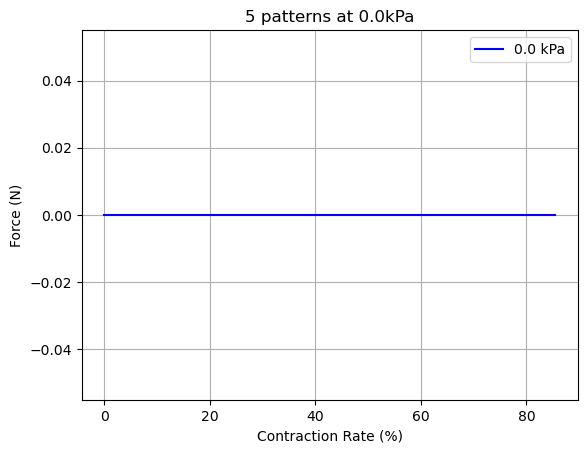

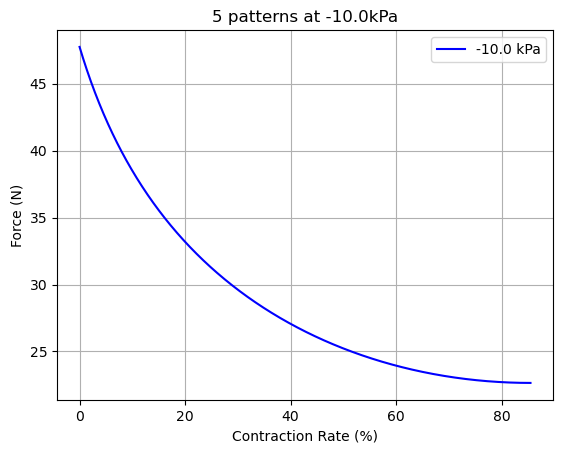

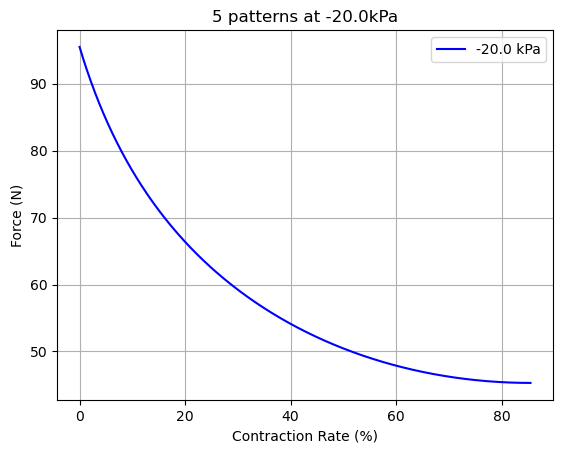

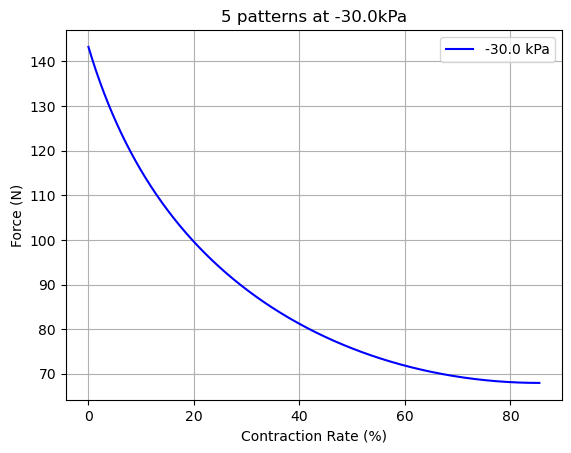

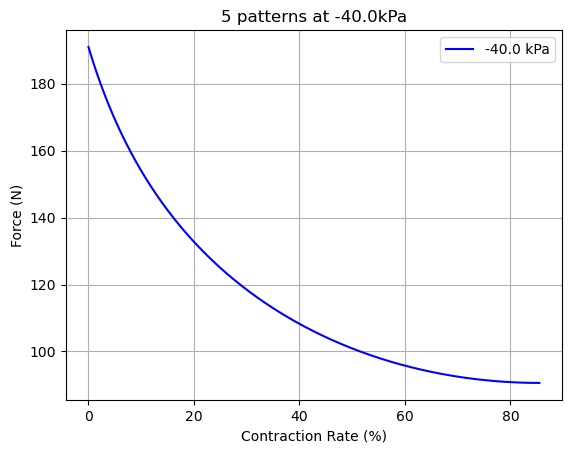

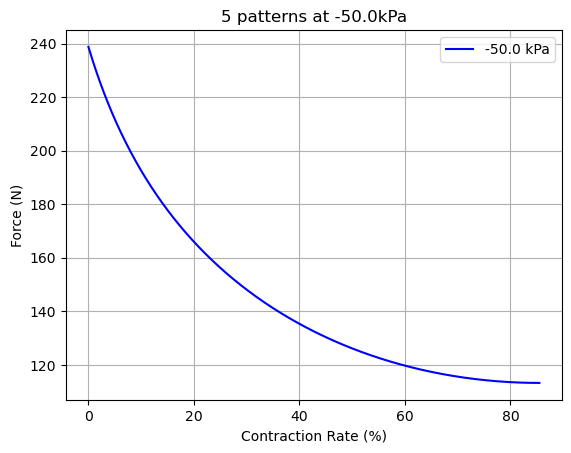

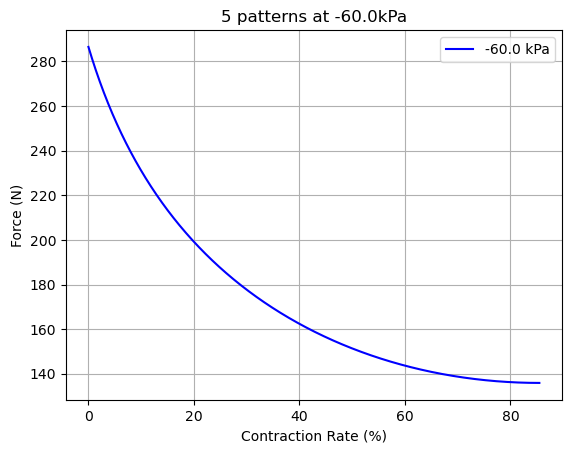

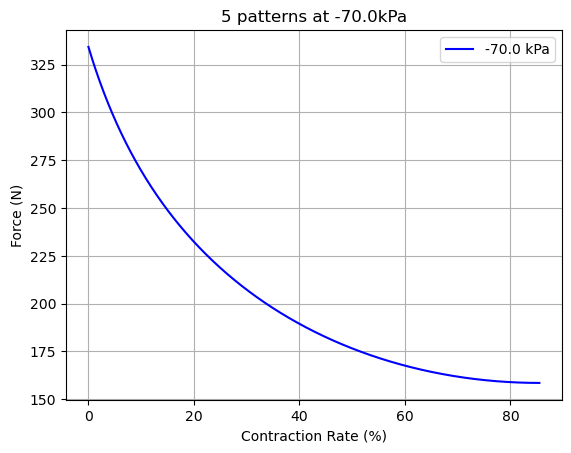

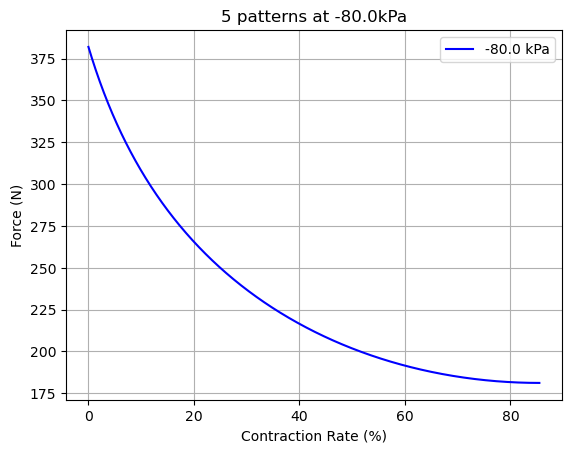

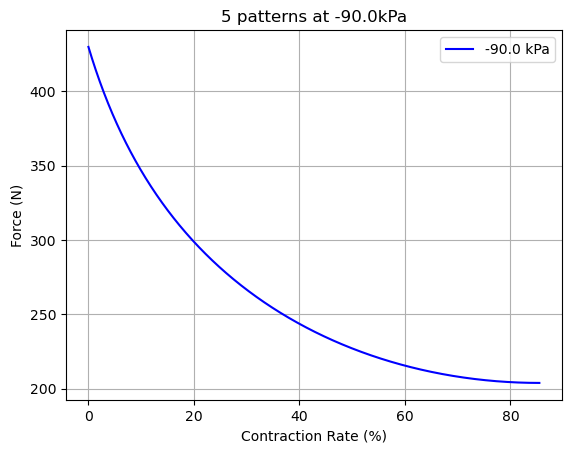

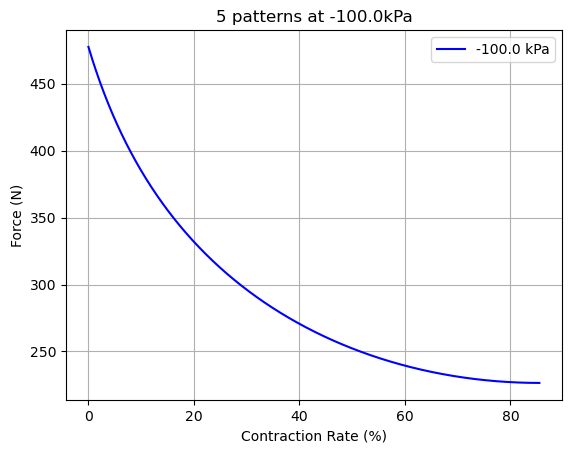

----------60 degrees angle Initial state ---------- 
inventor model volume is 69418.308mm^3
our model volume is 69418.30826906153mm^3 ---- our model error = 3.875944685604479e-07%
research model volume is 57443.502297175924mm^3 ---- research model error = 17.250212584876138%
----------30 degrees angle Initial state ---------- 
inventor model volume is 33486.336mm^3
our model volume is 33713.636273808566mm^3 ---- our model error = 0.6787851433150625%
research model volume is 70659.23576314333mm^3 ---- research model error = 111.00915837177085%
----------1 degrees angle Initial state ---------- 
inventor model volume is 1092.99mm^3
our model volume is 1095.5405192741405mm^3 ---- our model error = 0.2333524802734215%
research model volume is 3126.1390730836174mm^3 ---- research model error = 186.01717061305385%


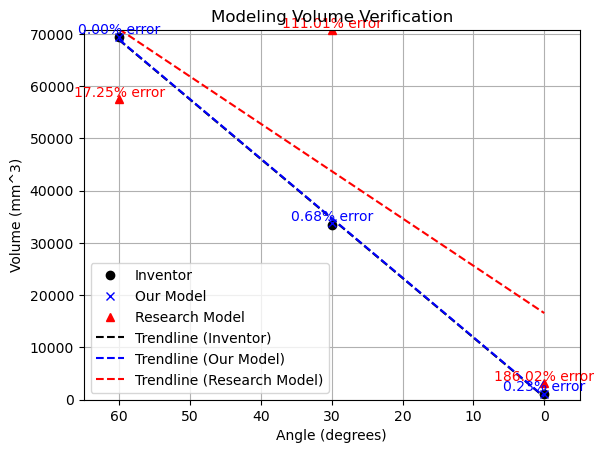

In [32]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(np.pi/180*60, 0, 1000)  ## rad// 60도~0도를 1000등분

initialangle = np.pi/3  ## 초기 상태에서 바닥과 이루는 벽면의 기울기
h = 24*10**-3  ## 층 한개의 높이
D = 27*10**-3  ## 정팔각형의 한 변의 길이 (우리가 조절 가능한 파라미터)
d = 7*10**-3  ## 모래시계 좁은쪽의 길이 (우리가 조절 가능한 파라미터)
s = 3.4*10**-3  ## 링과 상판, 하판의 높이 (액추에이터의 힘 함수에는 영향 없음)
R = 20.787*10**-3  ## 링 안쪽 정팔각형의 한 변의 길이 (액추에이터의 힘 함수에는 영향 없음)
L0 = h/np.sin(initialangle)  ## 한 층의 벽면을 위 아래로 따라서 잰 길이
q = 1/2*L0*np.cos(initialangle)  ## 옆으로 튀어나온 길이
n = 5  ## 액추에이터 층 갯수

# 함수 세우기
L = L0*np.sin(theta)  ## 액추에이터 수축 시 한 층의 높이 (세타에 대한 함수)
L_t = (n*L+(n+1)*s)  ## 액추에이터의 전체 높이

dL = L0*np.cos(theta)  ## L을 세타에 대하여 미분
dL_t = n*dL  ## 전체 높이 미분

V = 2*n*(1+2**0.5)*D**2*L0*np.sin(theta)-2/3*n*(2*D+d+q)*L0**2*np.cos(theta)*np.sin(theta)+2*(n-1)*(1+2**0.5)*R**2*s  ## 액추에이터 전체 부피
dV = 2*n*(1+2**0.5)*D**2*L0*np.cos(theta)-2/3*n*(2*D+d+q)*L0**2*(np.cos(theta)**2-np.sin(theta)**2)

# 압력 배열 선언하고 힘 함수 대입
P = [0]*11
F = [0]*11

for i in range(0, 11):
    P[i] = -10*(i)*10**3  ## Pa 단위
    F[i] = -P[i]*dV/dL_t

# 인벤터 부피랑 우리 모델, 논문 모델의 부피를 비교하여 오차율 구하기 (층 한 개의 부피만 계산)
V_re = np.zeros(3) 
V_ou = np.zeros(3) 
V_in = [69418.308, 33486.336, 1092.990]  ## 인벤터 iproperties에서 가져온 부피 ## mm^3 단위

nowAngle = [np.pi/180*60, np.pi/180*30, np.pi/180*1]  ## 각각 60도, 30도, 1도
DegreeAngle = [60, 30, 1]
alpha = np.zeros(3) ## 논문에서 사용하는 자체 각도
L_re = np.zeros(3) ## 논문에서 사용하는 높이

for i in range(0,3):
    alpha[i] = np.pi - 2*nowAngle[i]  ## 논문에서 사용하는 자체 각도와 우리가 쓰는 각도와의 관계식
    V_ou[i] = (2*(1+2**0.5)*D**2*L0*np.sin(nowAngle[i])-2/3*(2*D+d+q)*L0**2*np.cos(nowAngle[i])*np.sin(nowAngle[i]))*10**9  ## 우리 모델의 부피 식
    
    # 논문 부피의 수식 허용 범위 계산
    L_re[i] = L0*np.sin(nowAngle[i]) ##논문에서 사용하는 길이
    Lh = (L0 - L_re[i]/(2*np.pi))/2  ##논문에서 사용한 링에 붙는 벽면의 길이
    if 100 - L_re[i]/L_re[0]*100 < 36.34:  ## 수축률이 36.34%보다 낮으면 이 식을 사용
        V_re[i] = (2*D**2*L0*(1+2**0.5)*np.sin(alpha[i])/(alpha[i]) - 2*D*L0**2/(alpha[i])*(1-np.sin(alpha[i])*np.cos(alpha[i])/(alpha[i])))*10**9  ## 논문에서 사용한 부피 식
        print('L = ' + str(L_re[i]) + 'm / contraction ratio: ' + str(100 - L_re[i]/L_re[0]*100) + '%')
    else:  ## 수축률이 36.34%보다 높으면 이 식을 사용
        V_re[i] = (2*D**2*L_re[i]*(1+2**0.5)-(L_re[i]**2*D*np.pi-8*L_re[i]*Lh*D))*10**9
        print('The contraction ratio exceeds the permissible range. / contraction ratio: ' + str(100 - L_re[i]/L_re[0]*100) + '%')


contraction_rate = (1 - L_t / L_t[0])*100


for i in range(0,11):
    plt.plot(contraction_rate, F[i], 'b-', label= str(P[i]/10**3)+' kPa')
    plt.xlabel('Contraction Rate (%)')
    plt.ylabel('Force (N)')
    plt.legend()
    plt.grid(True)
    plt.title(str(n) + ' patterns at ' + str(P[i]/10**3)+'kPa')
    plt.show()


for i in range(0,3):
    print("----------"+str(DegreeAngle[i])+ " degrees angle Initial state ---------- ")
    print("inventor model volume is " + str(V_in[i]) + "mm^3" )
    print("our model volume is " + str(V_ou[i]) + "mm^3" + " ---- our model error = " + str(abs(V_in[i]-V_ou[i])/V_in[i]*100) + "%")
    print("research model volume is " + str(V_re[i]) + "mm^3"+ " ---- research model error = " + str(abs(V_in[i]-V_re[i])/V_in[i]*100) + "%")


# 데이터 설정
angles = [60, 30, 0]  # 각도

# 그래프 그리기 (다른 마커 스타일로 표시)
plt.plot(angles, V_in, 'o', color='black', label='Inventor')  # 파란색 원형 마커
plt.plot(angles, V_ou, 'x', color='blue', label='Our Model')  # 주황색 x 마커
plt.plot(angles, V_re, '^', color='red', label='Research Model')  # 초록색 세모 마커

# 추세선 그리기
coefficients_in = np.polyfit(angles, V_in, 1)
trendline_in = np.polyval(coefficients_in, angles)
plt.plot(angles, trendline_in, 'k--', label='Trendline (Inventor)')

coefficients_ou = np.polyfit(angles, V_ou, 1)
trendline_ou = np.polyval(coefficients_ou, angles)
plt.plot(angles, trendline_ou, 'b--', label='Trendline (Our Model)')

coefficients_re = np.polyfit(angles, V_re, 1)
trendline_re = np.polyval(coefficients_re, angles)
plt.plot(angles, trendline_re, 'r--', label='Trendline (Research Model)')

# 오차율 표시
for i in range(len(angles)):
    plt.text(angles[i], V_re[i], f'{abs(V_in[i]-V_re[i])/V_in[i]*100:.2f}% error', ha='center', va='bottom', color='red')
    plt.text(angles[i], V_ou[i], f'{abs(V_in[i]-V_ou[i])/V_in[i]*100:.2f}% error', ha='center', va='bottom', color='blue')

# 축 및 범례 설정
plt.xlabel('Angle (degrees)')
plt.ylabel('Volume (mm^3)')
plt.title('Modeling Volume Verification')
plt.legend()

# x축 뒤집기
plt.xlim(max(angles) + 5, min(angles) - 5)  # x축 여유 공간 추가
plt.ylim(0, max(max(V_in), max(V_ou), max(V_re)) + 50)  # y축 여유 공간 추가

# 그래프 표시
plt.grid(True)
plt.show()
